<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/stock_chart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')



In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import math
import numpy as np
import numpy.random as npr
import pandas as pd  
import pandas_datareader as pdr
import yfinance as yf

import scipy as sp
from scipy.stats import norm

from pylab import plt, mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'DejaVu Sans'
%matplotlib inline

pd.set_option('precision', 3)
pd.set_option('display.max_colwidth', 100)

In [4]:
def get_prices(tickers, freq_p, st_day, end_day):
    mystock = pd.DataFrame()
    for t in tickers:
        mystock[t] = yf.download(t, start=st_day, end=end_day, interval=freq_p)['Adj Close']
    return mystock

In [5]:
tic=['SPY', 'IEF', 'TLT','TSLA', 'AAPL', 'NVDA', 'BAC']
prices= get_prices(tic, freq_p='1d', st_day="2011-01-01", end_day="2022-05-31")  # id , 1wk, 1mo
print(prices)

prices.info()
prices.tail(20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                SPY      IEF      TLT     TSLA     AAPL     NVDA     BAC
Date                                                                    
2011-01-03  102.431   76.215   70.371    5.324   10.064    3.632  12.161
2011-01-04  102.375   76.394   70.453    5.334   10.116    3.621  12.204
2011-01-05  102.907   75.571   68.901    5.366   10.199    3.899  12.426
2011-01-06  102.706   75.962   69.203    5.576   10.191    4.438  12.375
2011-01-07  102.504   76.467   69.572    5.648   10.264    4.562  12.212
...   

,SPY,IEF,TLT,TSLA,AAPL,NVDA,BAC
Date,,,,,,,
2022-05-02,414.48,101.92,117.18,902.94,157.728,195.33,36.14
2022-05-03,416.38,102.04,117.97,909.25,159.246,196.02,37.13
2022-05-04,429.06,102.70,118.62,952.62,165.776,203.34,38.62
2022-05-05,413.81,101.67,115.37,873.28,156.540,188.44,37.54
2022-05-06,411.34,101.09,113.67,865.65,157.280,186.75,37.45
2022-05-09,398.17,101.84,114.67,787.11,152.060,169.50,36.37
2022-05-10,399.09,102.18,115.71,800.04,154.510,175.95,35.76
2022-05-11,392.75,102.81,117.94,734.00,146.500,166.30,35.57
2022-05-12,392.34,103.15,117.72,728.00,142.560,161.75,35.07


In [6]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2011-01-03 to 2022-05-27
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2871 non-null   float64
 1   IEF     2871 non-null   float64
 2   TLT     2871 non-null   float64
 3   TSLA    2871 non-null   float64
 4   AAPL    2871 non-null   float64
 5   NVDA    2871 non-null   float64
 6   BAC     2871 non-null   float64
dtypes: float64(7)
memory usage: 179.4 KB


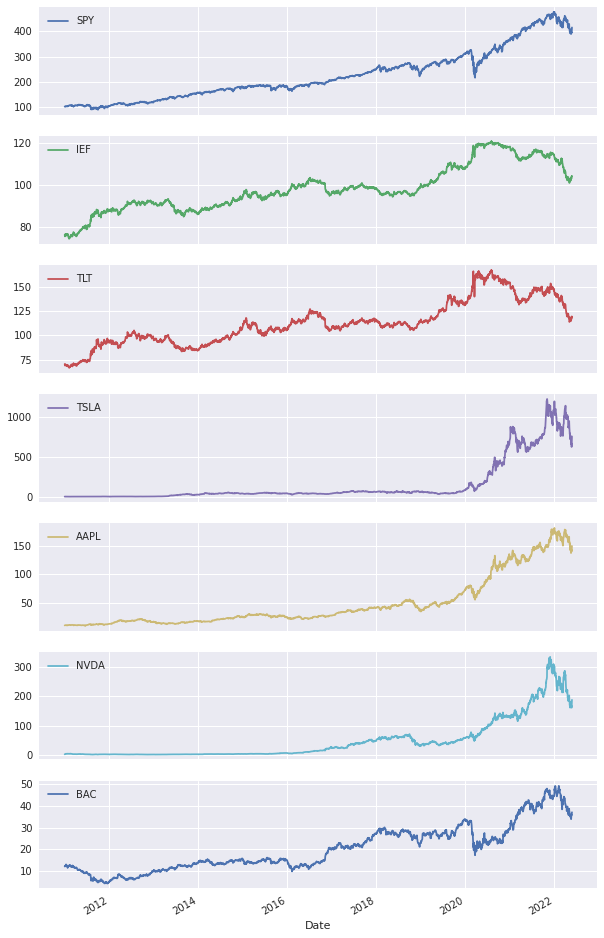

In [7]:
prices.plot(figsize=(10, 18), subplots=True);  

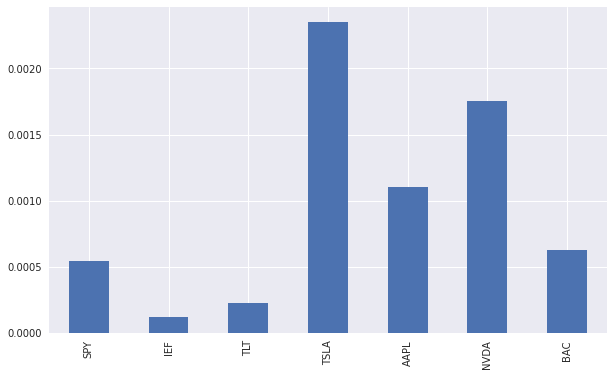

In [8]:
prices.pct_change().mean().plot(kind='bar', figsize=(10, 6));  

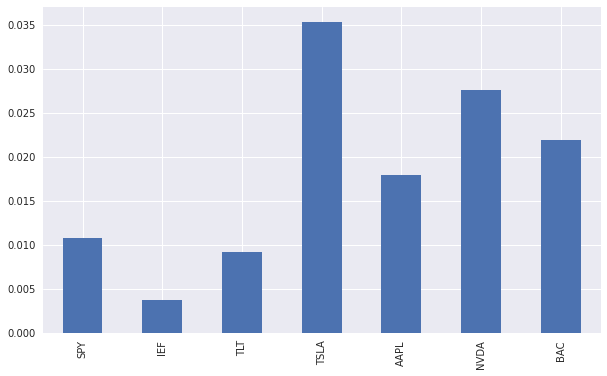

In [9]:
prices.pct_change().std().plot(kind='bar', figsize=(10, 6));  

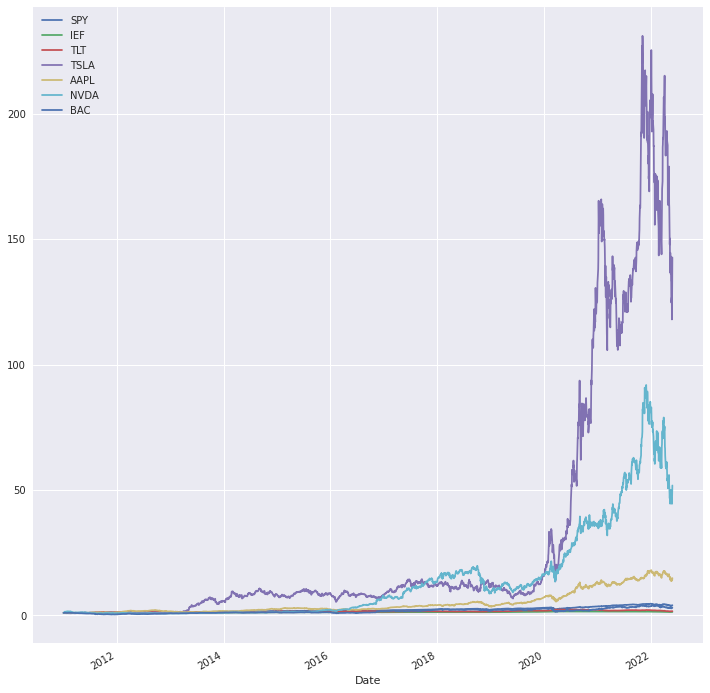

In [10]:
rets = np.log(prices / prices.shift(1))  
rets.cumsum().apply(np.exp).plot(figsize=(12, 13))  

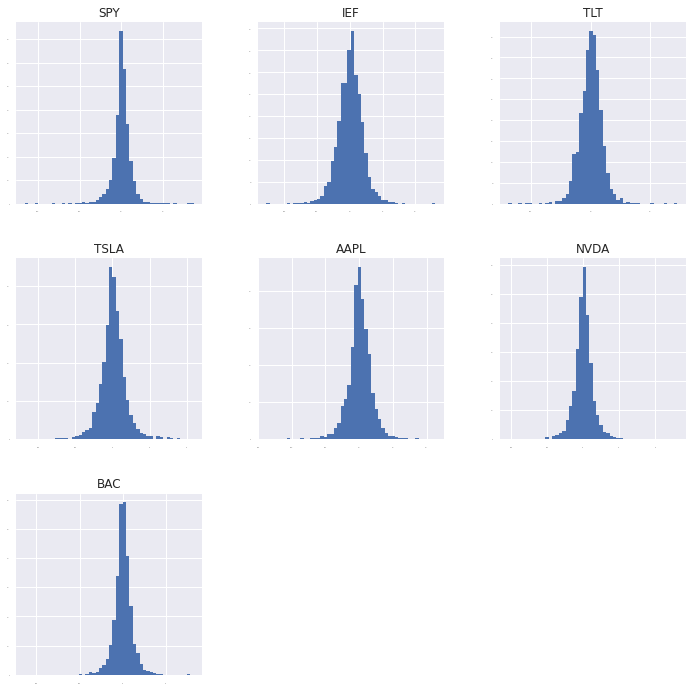

In [11]:
rets.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

The above histogram shows the distribution for each series individually. Next, lets look at the density distribution over the same x axis scale.

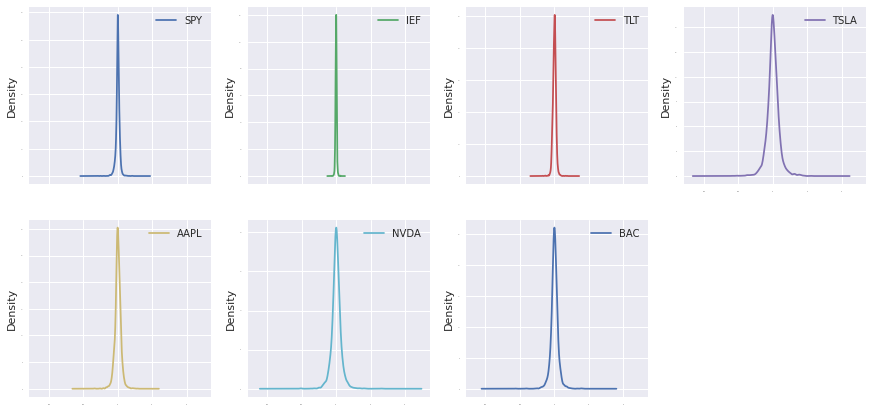

In [12]:
rets.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
plt.show()

We can see that the vix has a much larger variance compared to the other distributions.

In order to get a sense of the interdependence of the data we look at the scatter plot and the correlation matrix

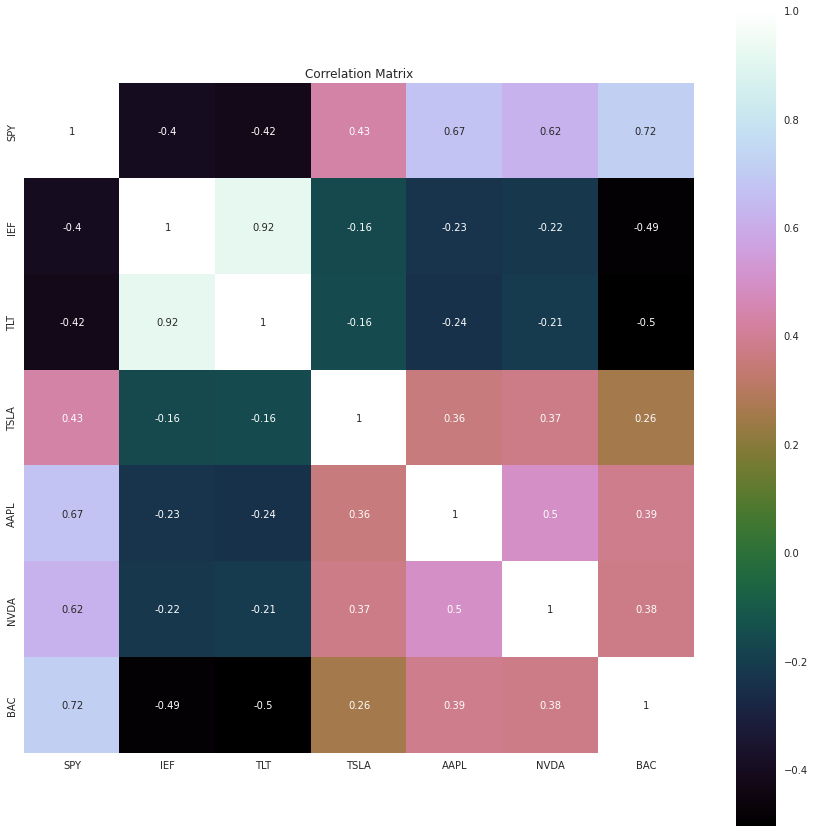

In [13]:
correlation = rets.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

Looking at the correlation plot above, we see some correlation of the predicted vari‐
able with the lagged 5 days, 15days, 30 days and 60 days return of MSFT. 

<Figure size 1080x1080 with 0 Axes>

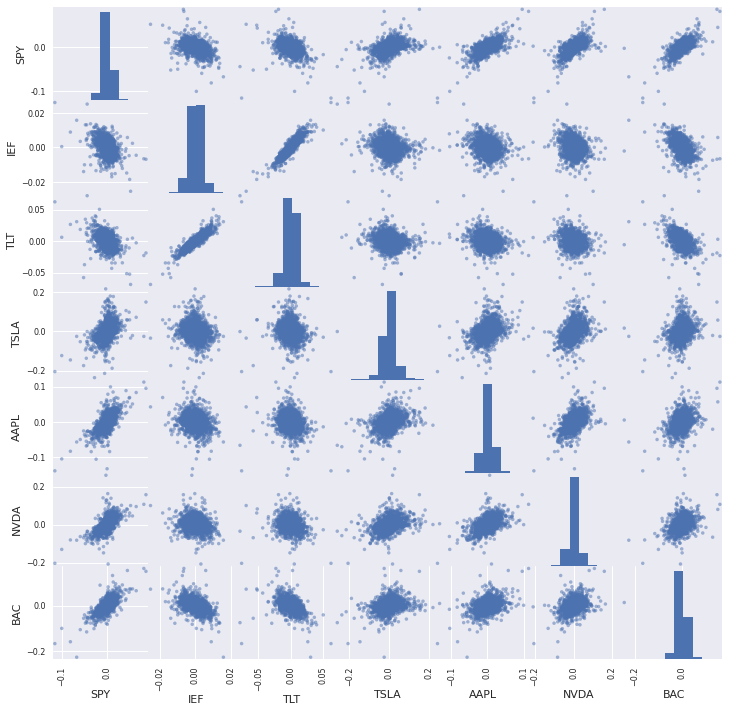

In [14]:
pyplot.figure(figsize=(15,15))
scatter_matrix(rets,figsize=(12,12))
pyplot.show()